# 如何再输入数据的时候制定列的类型？
    df.read_csv(dtype={'a':int,'b':'category'})

## 如何再已读入的时候改变列的类型？
注意一定要赋值
    df['A'] = df['A'].astype('category')

In [ ]:
%matplotlib inline
import pandas as pd

titan = pd.read_csv("./train.csv")
print titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [430]:
t_type={"PassengerId":"int32",
        "Survived":"bool",
        "Pclass":"category",
        "Name":"string",
        "Sex":"category",
        "Age":"float",
        "SibSp":"int32",
        "Parch":"int32",
        "Ticket":"string",
        "Fare":"float",
        "Cabin":"string",
        "Embarked":"category"
}
titan2 = pd.read_csv("./train.csv",dtype=t_type)
titan2
print titan2.dtypes

PassengerId       int32
Survived           bool
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int32
Parch             int32
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


# 处理age的缺失值

In [431]:
titan["Age"]=titan["Age"].fillna(titan["Age"].mean())

In [432]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,13.00,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,29.70,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [433]:
import matplotlib.pyplot as plt

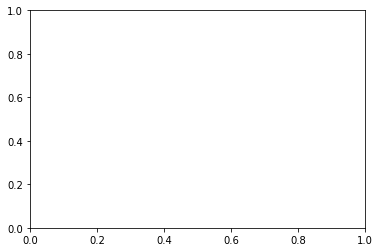

In [434]:
fig,ax = plt.subplots()

In [435]:
ax.plot(titan["Age"],titan["Survived"],'o')

In [436]:
plt.show()

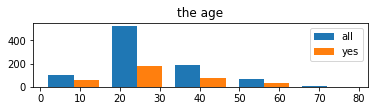

In [437]:
import pandas as pd
import matplotlib.pyplot as plt


titan = pd.read_csv("./train.csv")


# 对数据进行类别的处理
titan["Age"]=titan["Age"].fillna(titan["Age"].mean())
# titan["Pclass"]=titan["Pclass"].astype('category')
titan["Sex"]=titan["Sex"].astype('category')
titan["Embarked"]=titan["Embarked"].astype('category')
# titan["SibSp"]=titan["SibSp"].astype('category')
# titan["Parch"]=titan["Parch"].astype('category')


# 画图操作
fig = plt.figure()

plt.subplot(311)
# 取出生存者，和死亡者的年龄，年龄为连续值
age_yes = titan["Age"][titan["Survived"]==1]
age_no = titan["Age"][titan["Survived"]==0]
age_all = [pd.concat([age_yes,age_no]),age_yes]
plt.hist(age_all,5,histtype="bar",label=["all","yes"])
plt.title("the age")
plt.legend()

In [438]:
import numpy as np

In [439]:
pd.pivot_table(titan[['Sex',"Survived"]],values="Survived",columns="Sex",aggfunc=np.sum)

Sex,female,male
Survived,233,109


## 副本或者是原始值
df.loc[row_indexer,col_indexer] 返回的是原始的实际值
df['col_indexer']返回的是pandas的副本

In [440]:
sexs=titan[['Sex',"Survived"]]
sexs["count"]=1
sexs

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sex,Survived,count
0,male,0,1
1,female,1,1
2,female,1,1
3,female,1,1
4,male,0,1
5,male,0,1
6,male,0,1
7,male,0,1
8,female,1,1
9,female,1,1


# 性别是很重要的特征

In [441]:
sexs_prob=pd.pivot_table(sexs,index = "Sex",columns="Survived",values="count",aggfunc=np.sum)
sexs_prob['pres'] = sexs_prob[1]/(sexs_prob[1]+sexs_prob[0])
sexs_prob

Survived,0,1,pres
Sex,,,
female,81,233,0.74
male,468,109,0.19


# 性别比例画图

# 仓位信息与生存几率

In [442]:
pclass_sur = titan[['Pclass','Survived']]
pclass_sur["count"]=1
pclass_sur

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Survived,count
0,3,0,1
1,1,1,1
2,3,1,1
3,1,1,1
4,3,0,1
5,3,0,1
6,1,0,1
7,3,0,1
8,3,1,1
9,2,1,1


In [443]:
pclass_sur_piv=pd.pivot_table(pclass_sur,index='Pclass',columns='Survived',values='count',aggfunc=np.sum)
pclass_sur_piv["pers"]=pclass_sur_piv[1]/(pclass_sur_piv[0]+pclass_sur_piv[1])
pclass_sur_piv

Survived,0,1,pers
Pclass,,,
1,80,136,0.63
2,97,87,0.47
3,372,119,0.24


([array([  80.,    0.,   97.,    0.,  372.]),
  array([ 136.,    0.,   87.,    0.,  119.])],
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 2 Lists of Patches objects>)

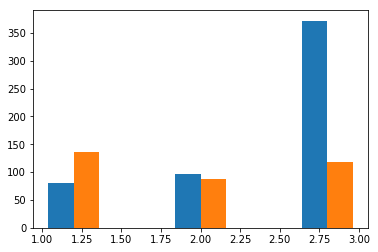

In [444]:
age_yes = titan["Pclass"][titan["Survived"]==1]
age_no = titan["Pclass"][titan["Survived"]==0]
# age_all = [pd.concat([age_yes,age_no]),age_yes]
age_all = [age_no,age_yes]
plt.hist(age_all,5,histtype="bar",label=["all","yes"])

In [445]:
slib_s = titan[["SibSp","Survived"]]
slib_s['count']=1
slib_s

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SibSp,Survived,count
0,1,0,1
1,1,1,1
2,0,1,1
3,1,1,1
4,0,0,1
5,0,0,1
6,0,0,1
7,3,0,1
8,0,1,1
9,1,1,1


In [446]:
sibsp_s=pd.pivot_table(slib_s,index="SibSp",columns='Survived',values='count',aggfunc=np.sum)
sibsp_s[1]=sibsp_s[1].fillna(0)
# sibsp_s["pres"] = slib_s[1]/(slib_s[1]+slib_s[0])
sibsp_s

Survived,0,1
SibSp,,
0,398.00,210.00
1,97.00,112.00
2,15.00,13.00
3,12.00,4.00
4,15.00,3.00
5,5.00,0.00
8,7.00,0.00


In [447]:
par_s1 = titan[["Parch","Survived"]]
par_s1["Parch"][par_s1["Parch"]>1]=1
par_s1['count']=1
par_s=pd.pivot_table(par_s1,index="Parch",columns='Survived',values='count',aggfunc=np.sum)
par_s[1]=par_s[1].fillna(0)
par_s["pres"] = par_s[1]/(par_s[1]+par_s[0])
par_s

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Survived,0,1,pres
Parch,,,
0,445,233,0.34
1,104,109,0.51


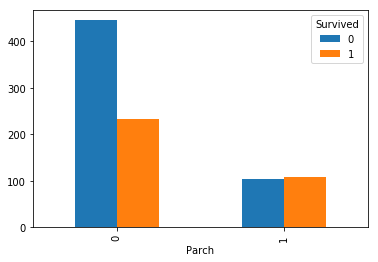

In [448]:
par_s[[0,1]].plot(kind="bar")

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


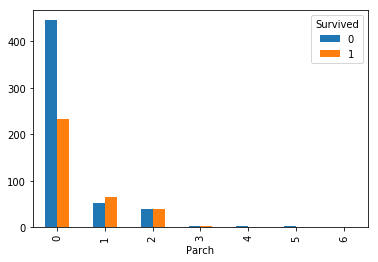

In [449]:
par_s1 = titan[["Parch","Survived"]]
par_s1['count']=1
par_s=pd.pivot_table(par_s1,index="Parch",columns='Survived',values='count',aggfunc=np.sum)
par_s[1]=par_s[1].fillna(0)
par_s["pres"] = par_s[1]/(par_s[1]+par_s[0])
par_s
par_s[[0,1]].plot(kind="bar")

In [450]:
emb_s = titan[["Embarked","Survived"]]
emb_s['count']=1
emb_s=pd.pivot_table(emb_s,index="Embarked",columns='Survived',values='count',aggfunc=np.sum)
emb_s[1]=emb_s[1].fillna(0)
emb_s["pres"] = emb_s[1]/(emb_s[1]+emb_s[0])
emb_s

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Survived,0,1,pres
Embarked,,,
C,75,93,0.55
Q,47,30,0.39
S,427,217,0.34


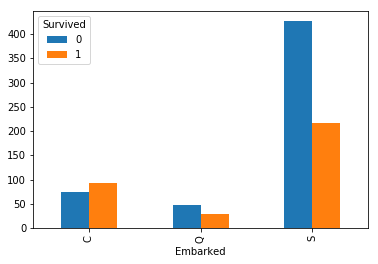

In [451]:
emb_s[[0,1]].plot(kind="bar")

In [452]:
emb_s[[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# 当列为数字的时候，选取列有两种写法
1. 直接 emb_s[[0,1]]这样选取多列
2. 用loc数组，注意，emb_s.loc[:,1]表示**列名**为1的列

In [453]:
emb_s.loc[:,[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [454]:
emb_s.loc[:,0]

Embarked
C     75
Q     47
S    427
Name: 0, dtype: int64

In [455]:
emb_s.loc[:,[0]]

Survived,0
Embarked,
C,75
Q,47
S,427


In [456]:
list(emb_s.index)

['C', 'Q', 'S']

In [457]:
list(emb_s[0])

[75, 47, 427]

In [458]:
emb_s['pres']

Embarked
C   0.55
Q   0.39
S   0.34
Name: pres, dtype: float64

# 画这种多轴的图如何画
1. 手动生成跟列表长度相同的数字序列
2. 把这些数字作为横轴，需要画的数据作为值，画一个轴
3. 重复，画第二个值
4. 手动定义标签的位置
5. 手动赋值标签的值

[Text(0,0,u'C'), Text(0,0,u'Q'), Text(0,0,u'S')]

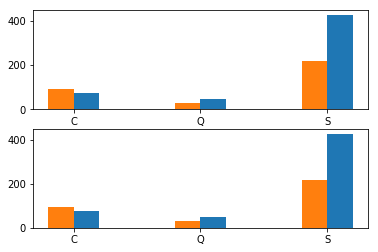

In [459]:
fig = plt.figure()
ax = plt.subplot(211)
width = 0.2
ind = np.arange(len(emb_s[0]))
ax.bar(ind+width,list(emb_s[0]),width)
ax.bar(ind,list(emb_s[1]),width)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(emb_s.index)


ax2=plt.subplot(212)
width = 0.2
ind = np.arange(len(emb_s[0]))
ax2.bar(ind+width,list(emb_s[0]),width)
ax2.bar(ind,list(emb_s[1]),width)
ax2.set_xticks(ind+width/2)
ax2.set_xticklabels(emb_s.index)



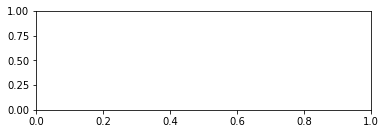

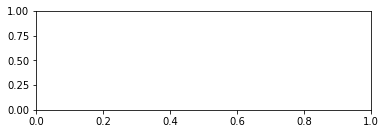

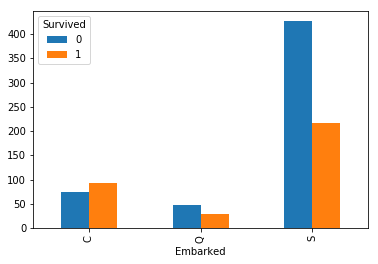

In [460]:
plt.subplot(211)
emb_s[[0,1]].plot(kind="bar")


plt.subplot(212)
emb_s[[0,1]].plot(kind="bar")
# plt.show()

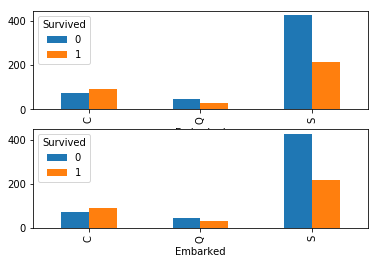

In [461]:
fig,axs = plt.subplots(2,1)
emb_s[[0,1]].plot(kind="bar",ax = axs[0])
emb_s[[0,1]].plot(kind="bar",ax = axs[1])
# plt.show()

In [462]:
emb_s[[0,1]]

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# 写一个自动提取比例，然后计算各单个变量与目标值的相关性
1. 获取所有category类型
2. 用`pd.pivote_table`处理
3. 计算比例
4. 循环计算每一个

# 缺失值处理，用sikit-learn 里面的处理

In [463]:
from sklearn.preprocessing import Imputer

# 直接再pandas里面画图，更加方便
直到需要自己手动微调图片

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82c414e450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f82c3fef510>], dtype=object)

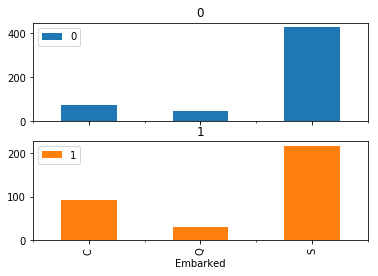

In [464]:
emb_s[[0,1]].plot(kind="bar",subplots=True)

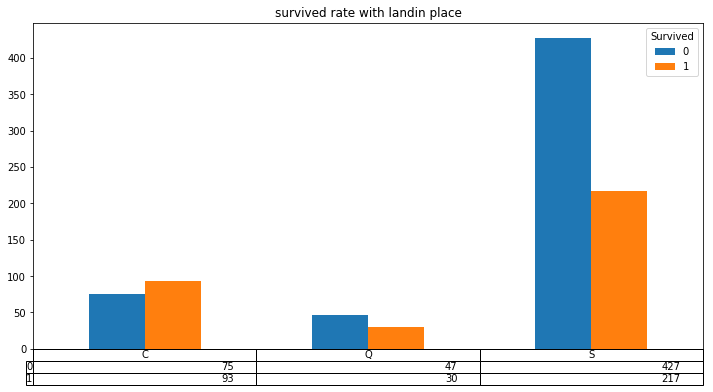

In [465]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.get_xaxis().set_visible(False)
emb_s[[0,1]].plot(kind="bar",table=True,ax = ax,title="survived rate with landin place")

In [466]:
from sklearn.preprocessing import Imputer

In [467]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.70,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [468]:
len(titan2["Age"]),len(titan2["PassengerId"])

(891, 891)

# 处理缺失值
1. 从文件中读入
2. describe
3. 显示缺失值
4. 处理缺失值

In [469]:
titan_n = pd.read_csv("./train.csv")
titan_n.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [470]:
list(set(titan_n["Age"]))

[nan,
 nan,
 2.0,
 3.0,
 4.0,
 5.0,
 nan,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 nan,
 32.0,
 33.0,
 34.0,
 35.0,
 1.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 30.5,
 nan,
 70.0,
 71.0,
 nan,
 nan,
 nan,
 80.0,
 nan,
 nan,
 nan,
 0.67000000000000004,
 nan,
 nan,
 55.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 36.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 14.5,
 0.82999999999999996,
 23.5,
 nan,
 nan,
 nan,
 nan,
 24.5,
 nan,
 nan,
 74.0,
 0.41999999999999998,
 nan,
 6.0,
 31.0,
 nan,
 28.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 36.0,
 nan,
 40.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

In [471]:
im = Imputer(axis=0,missing_values=np.NaN,strategy="mean")

In [472]:
titan_n.loc[:,"Age"]

0     22.00
1     38.00
2     26.00
3     35.00
4     35.00
5       nan
6     54.00
7      2.00
8     27.00
9     14.00
10     4.00
11    58.00
12    20.00
13    39.00
14    14.00
15    55.00
16     2.00
17      nan
18    31.00
19      nan
20    35.00
21    34.00
22    15.00
23    28.00
24     8.00
25    38.00
26      nan
27    19.00
28      nan
29      nan
       ... 
861   21.00
862   48.00
863     nan
864   24.00
865   42.00
866   27.00
867   31.00
868     nan
869    4.00
870   26.00
871   47.00
872   33.00
873   47.00
874   28.00
875   15.00
876   20.00
877   19.00
878     nan
879   56.00
880   25.00
881   33.00
882   22.00
883   28.00
884   25.00
885   39.00
886   27.00
887   19.00
888     nan
889   26.00
890   32.00
Name: Age, Length: 891, dtype: float64

In [473]:
titan_n.loc[:,"Age"]=im.fit_transform(titan_n["Age"].values.reshape(-1,1))

In [474]:
titan_n.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,13.00,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,29.70,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [475]:
rs =pd.get_dummies(titan_n.loc[:,["Embarked","Sex"]],prefix="Embarked")
rs

,Embarked_C,Embarked_Q,Embarked_S,Embarked_female,Embarked_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
5,0,1,0,0,1
6,0,0,1,0,1
7,0,0,1,0,1
8,0,0,1,1,0
9,1,0,0,1,0


In [476]:
pd.concat([titan_n.loc[:,["PassengerId","Survived","Pclass","Age","SibSp","Parch"]],rs],axis=1).loc[61:65,:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_female,Embarked_male
61,62,1,1,38.00,0,0,0,0,0,1,0
62,63,0,1,45.00,1,0,0,0,1,0,1
63,64,0,3,4.00,3,2,0,0,1,0,1
64,65,0,1,29.70,0,0,1,0,0,0,1
65,66,1,3,29.70,1,1,1,0,0,0,1


In [477]:
titan_pre=pd.concat([titan_n.loc[:,["PassengerId","Survived","Pclass","Age","SibSp","Parch"]],rs],axis=1)
titan_pre

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_female,Embarked_male
0,1,0,3,22.00,1,0,0,0,1,0,1
1,2,1,1,38.00,1,0,1,0,0,1,0
2,3,1,3,26.00,0,0,0,0,1,1,0
3,4,1,1,35.00,1,0,0,0,1,1,0
4,5,0,3,35.00,0,0,0,0,1,0,1
5,6,0,3,29.70,0,0,0,1,0,0,1
6,7,0,1,54.00,0,0,0,0,1,0,1
7,8,0,3,2.00,3,1,0,0,1,0,1
8,9,1,3,27.00,0,2,0,0,1,1,0
9,10,1,2,14.00,1,0,1,0,0,1,0


In [478]:
pocs_col=["SibSp","Parch"]
d=titan_pre.loc[:,pocs_col]
d[d>1]= 1
titan_pre.loc[:,pocs_col]=d
titan_pre

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_female,Embarked_male
0,1,0,3,22.00,1,0,0,0,1,0,1
1,2,1,1,38.00,1,0,1,0,0,1,0
2,3,1,3,26.00,0,0,0,0,1,1,0
3,4,1,1,35.00,1,0,0,0,1,1,0
4,5,0,3,35.00,0,0,0,0,1,0,1
5,6,0,3,29.70,0,0,0,1,0,0,1
6,7,0,1,54.00,0,0,0,0,1,0,1
7,8,0,3,2.00,1,1,0,0,1,0,1
8,9,1,3,27.00,0,1,0,0,1,1,0
9,10,1,2,14.00,1,0,1,0,0,1,0


In [479]:
titan_pre.to_csv("./titan_pre.csv")

In [480]:
titan_pre.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Age                float64
SibSp                int64
Parch                int64
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
Embarked_female      uint8
Embarked_male        uint8
dtype: object

# 处理训练集
1. 读入
2. onehot编码
3. 拼接
4. 属性处理
5. 导出csv

# 1.读入数据

In [481]:
t_data = pd.read_csv("./test.csv")

# 2. onehot编码

In [482]:
t_oneh=pd.get_dummies(t_data.loc[:,["Embarked","Sex"]])
t_oneh

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,1,0,0,1
1,0,0,1,1,0
2,0,1,0,0,1
3,0,0,1,0,1
4,0,0,1,1,0
5,0,0,1,0,1
6,0,1,0,1,0
7,0,0,1,0,1
8,1,0,0,1,0
9,0,0,1,0,1


# 3. 拼接

In [483]:
t_data.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [484]:
t_data["Ticket"].head(5)

0     330911
1     363272
2     240276
3     315154
4    3101298
Name: Ticket, dtype: object

In [485]:
t_data["Age"].values

array([ 34.5 ,  47.  ,  62.  ,  27.  ,  22.  ,  14.  ,  30.  ,  26.  ,
        18.  ,  21.  ,    nan,  46.  ,  23.  ,  63.  ,  47.  ,  24.  ,
        35.  ,  21.  ,  27.  ,  45.  ,  55.  ,   9.  ,    nan,  21.  ,
        48.  ,  50.  ,  22.  ,  22.5 ,  41.  ,    nan,  50.  ,  24.  ,
        33.  ,    nan,  30.  ,  18.5 ,    nan,  21.  ,  25.  ,    nan,
        39.  ,    nan,  41.  ,  30.  ,  45.  ,  25.  ,  45.  ,    nan,
        60.  ,  36.  ,  24.  ,  27.  ,  20.  ,  28.  ,    nan,  10.  ,
        35.  ,  25.  ,    nan,  36.  ,  17.  ,  32.  ,  18.  ,  22.  ,
        13.  ,    nan,  18.  ,  47.  ,  31.  ,  60.  ,  24.  ,  21.  ,
        29.  ,  28.5 ,  35.  ,  32.5 ,    nan,  55.  ,  30.  ,  24.  ,
         6.  ,  67.  ,  49.  ,    nan,    nan,    nan,  27.  ,  18.  ,
          nan,   2.  ,  22.  ,    nan,  27.  ,    nan,  25.  ,  25.  ,
        76.  ,  29.  ,  20.  ,  33.  ,  43.  ,  27.  ,    nan,  26.  ,
        16.  ,  28.  ,  21.  ,    nan,    nan,  18.5 ,  41.  ,    nan,
      

In [486]:
t_data.loc[:,"Age"]=im.fit_transform(t_data["Age"].values.reshape(-1,1))
t_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,418.00,418.00,417.00
mean,"1,100.50",2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,12.63,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,23.00,0.00,0.00,7.90
50%,"1,100.50",3.00,30.27,0.00,0.00,14.45
75%,"1,204.75",3.00,35.75,1.00,0.00,31.50
max,"1,309.00",3.00,76.00,8.00,9.00,512.33


In [487]:

# pocs_col=["SibSp","Parch"]
# d=titan_pre.loc[:,pocs_col]
# d[d>1]= 1
# titan_pre.loc[:,pocs_col]=d
# titan_pre

poc=['SibSp','Parch']
d=t_data[poc]
d[d>1]=1
t_data.loc[:,poc]=d
t_data

/home/zhouyao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.22,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.63,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.00,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.23,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,1,0,A/4 48871,24.15,NaN,S


# 4.属性合并处理

In [488]:
t_pre = pd.concat([t_data[["Pclass","Age",'SibSp','Parch']],t_oneh],axis=1)
t_pre

,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.50,0,0,0,1,0,0,1
1,3,47.00,1,0,0,0,1,1,0
2,2,62.00,0,0,0,1,0,0,1
3,3,27.00,0,0,0,0,1,0,1
4,3,22.00,1,1,0,0,1,1,0
5,3,14.00,0,0,0,0,1,0,1
6,3,30.00,0,0,0,1,0,1,0
7,2,26.00,1,1,0,0,1,0,1
8,3,18.00,0,0,1,0,0,1,0
9,3,21.00,1,0,0,0,1,0,1


# 5 导出csv

In [489]:
t_pre.to_csv("./test_pre.csv")

# 他山之石

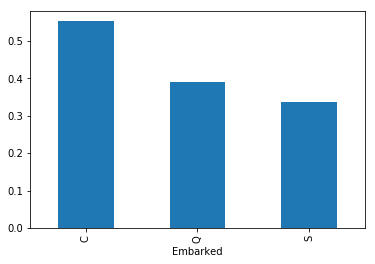

In [490]:
max_survived_rate=(titan.groupby(['Embarked']).sum()/titan.groupby(['Embarked']).count())['Survived']
max_survived_rate.plot(kind='bar')

# 实验用

In [491]:
titan.groupby(['Embarked']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,"5,134.49",65,61,"10,072.30"
Q,32178,30,224,"2,241.76",33,13,"1,022.25"
S,289496,217,1514,"18,985.67",368,266,"17,439.40"


In [492]:
titan.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69
Q,77,77,77,77,77,77,77,77,77,77,4
S,644,644,644,644,644,644,644,644,644,644,129


In [493]:
t_e = titan.groupby(['Embarked']).sum()/titan.groupby(['Embarked']).count()
pd.options.display.float_format = '{:,.2f}'.format
t_e

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
Embarked,,,,,,,,,,,
C,30.56,nan,59.95,nan,0.36,445.36,1.89,nan,0.39,0.55,nan
Q,29.11,nan,13.28,nan,0.17,417.90,2.91,nan,0.43,0.39,nan
S,29.48,nan,27.08,nan,0.41,449.53,2.35,nan,0.57,0.34,nan


## 直接用groupby处理适用场景
1. 适用于预测的结果为二分类问题，这样才能使用count和sum

# 当出现下面这种情况
1. 类别数据很多
2. 预测结果为多类例如多对多的这种情况
这种情况，画图就只能用pivottable了。

embarked  survived
c         1
Q         2
S         3

## pivote流程
1. 添加一列
2. 写pivot_table

## 如果需要汇总还原
1. stack 变成一维数据
2. reset_index

In [494]:
titan["Count"]=1
pvot=pd.pivot_table(titan[["Embarked","Survived","Count"]],index="Embarked",columns="Survived",aggfunc=np.sum)
pvot

Count     
Survived     0    1
Embarked           
C           75   93
Q           47   30
S          427  217

In [495]:
pvot.unstack(level=0)

       Survived  Embarked
Count  0         C            75
                 Q            47
                 S           427
       1         C            93
                 Q            30
                 S           217
dtype: int64

In [496]:
pvot.stack()

Count
Embarked Survived       
C        0            75
         1            93
Q        0            47
         1            30
S        0           427
         1           217

In [497]:
pvot.stack().reset_index()

,Embarked,Survived,Count
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


In [498]:
pvot_unstack= pvot.unstack().reset_index().drop(["level_0"],axis=1)
pvot_unstack

,Survived,Embarked,0
0,0,C,75
1,0,Q,47
2,0,S,427
3,1,C,93
4,1,Q,30
5,1,S,217


In [499]:
pd.melt(titan[["Embarked","Survived"]],value_vars="Survived",id_vars='Embarked').head(5)

,Embarked,variable,value
0,S,Survived,0
1,C,Survived,1
2,S,Survived,1
3,S,Survived,1
4,S,Survived,0


## reset_index 怎么把多余的level去除？
用drop函数，drop可以使用行，也可以使用列

df.drop(['a', 'd'], axis=0)

Parch [233  65  40   3   0   1   0]
SibSp [210 112  13   4   3   0   0]
Pclass [136  87 119]
Sex [233 109]
Embarked [ 93  30 217]


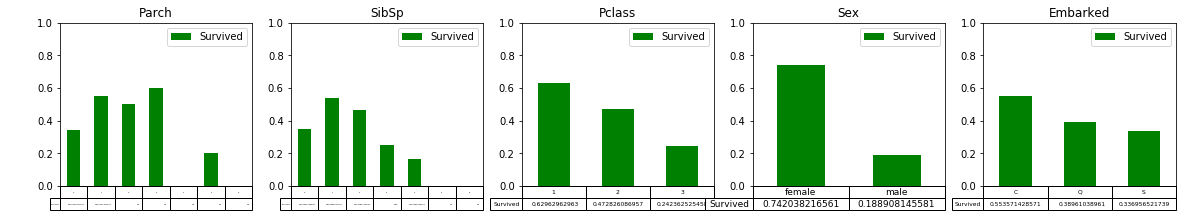

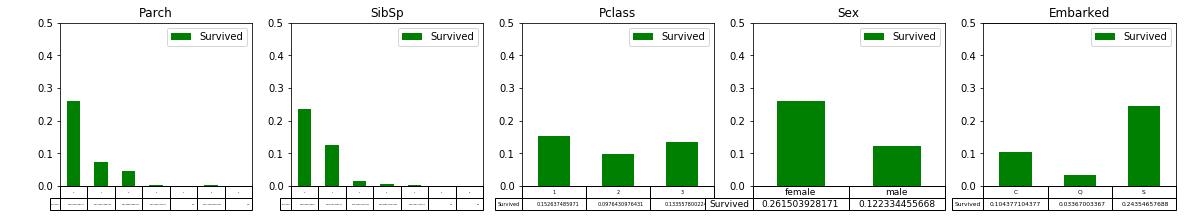

In [500]:
items = ['Parch',"SibSp","Pclass","Sex","Embarked"]
fig,ax = plt.subplots(1,5,figsize=(20,3))
fig,ax2 = plt.subplots(1,5,figsize=(20,3))
plt.axhline(0.5,color='k')
for i in range(len(items)):
    t_g= titan.groupby(items[i])
    ax[i].get_xaxis().set_visible(False)
    ax2[i].get_xaxis().set_visible(False)
    (t_g.sum()/t_g.count())['Survived'].plot(kind='bar',ax=ax[i],title=items[i],ylim=[0,1],legend=True,table=True,color='g')
    (t_g.sum()/titan.count())['Survived'].plot(kind='bar',ax=ax2[i],title=items[i],ylim=[0,0.5],legend=True,table=True,color='g')
    print items[i],t_g.sum()['Survived'].values
    


# 他山之石demo

## 1. 数据预处理

1. 读入数据
2. 用head(5)查看数据（直接查看数据，这样数据会很长）
3. 用info() 查看基本的数据类型和有无缺失值
4.

In [501]:
data = pd.read_csv("./train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


## 这里查看所有的列 的基本情况
包括，
1. 行数量，列数量
2. 各个列的数据类型
3. 列各个类型的个数

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [503]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [504]:
data["Age"].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [505]:
data = data[data["Age"]>0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [506]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S


In [507]:
onehot_columns = ['Sex','Embarked']
ohot=pd.get_dummies(data.loc[:,onehot_columns])
ohot.head(5)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


## 把cabin列，存在的作为1，不存在的设置为0

注意先操作非空的，再操作为空的。不然的话。。你先操作为空的，操做完之后，就不为空。下一步操作就会把之前的东西覆盖掉

学习到的操作一： 直接再loc中原地选择列和行进行处理

学习到的操作二： 把数据处理的步骤写成一个函数，这样，再清理测试数据的时候，就可以重复利用

In [510]:
# 先操作非空的，如果顺序操作反了，就都成空的了
# 只能操作一次
def process_cabin(df):
    df.loc[df['Cabin'].notnull(),'Cabin']=1
    df.loc[df['Cabin'].isnull(),'Cabin']=0
    df.head(5)
    return df
# process_cabin(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,0,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,0,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.70,1,S


In [512]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,0,S


1. onehot编码
2. 集成到data里面
3. 丢掉多余的列

In [533]:
def one_hot(df):
    onehcol=['Sex',"Embarked",'Cabin']
    oh = pd.get_dummies(df[['Sex',"Embarked",'Cabin']])
    return pd.concat([df,oh],axis=1,copy=False)
    
# one_hot(data)

In [531]:
# 丢弃不必要的列
def drop_col(df):
    drop_c=['Name','Age','Ticket','Cabin','Embarked','Fare','Sex']
    return df.drop(drop_c,axis=1)
# drop_col(data).head(3)

In [532]:
data = pd.read_csv('./train.csv')
p1 = process_cabin(data)
p2 = one_hot(p1)
p3 = drop_col(p2)
p3.head(3)

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1
0,1,0,3,1,0,0,1,0,0,1,1,0
1,2,1,1,1,0,1,0,1,0,0,0,1
2,3,1,3,0,0,1,0,0,0,1,1,0
